In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-co2-emissions-dataset/co2.csv


In [2]:
df = pd.read_csv('/kaggle/input/vehicle-co2-emissions-dataset/co2.csv')

In [3]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


How big is the data ?

In [4]:
df.shape

(7385, 12)

How my dataset look like ?

In [5]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**Some Datasets are not similiar as they are in the begining how to check them all**

In [6]:
df.sample(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
6658,CADILLAC,CT5,MID-SIZE,2.0,4,AS10,Z,10.4,7.3,9.0,31,209
1522,GMC,CANYON,PICKUP TRUCK - SMALL,2.5,4,A6,X,11.9,8.8,10.5,27,242
7323,TOYOTA,Camry AWD LE/SE,MID-SIZE,2.5,4,AS8,X,9.3,6.8,8.2,34,190
5326,PORSCHE,PANAMERA 4S ST,FULL-SIZE,2.9,6,AM8,Z,12.1,9.0,10.7,26,249
3640,FORD,ESCAPE FFV,SUV - SMALL,2.5,4,AS6,X,11.1,8.1,9.7,29,229


All informations about the column can be checked by 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

is there any missing value in the data ?

In [8]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

how does the data look like mathematically ?

In [9]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


is there any duplicate value in our column ?

In [10]:
df.duplicated().sum()

1103

In [11]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
12,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193
13,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
15,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163


In [12]:
duplicates_except_first = df[df.duplicated(keep='first')]
duplicates_except_first

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163


In [13]:
# Example of specifying columns to check for duplicates
manual_duplicates_check = df[df.duplicated(subset=['Make', 'Model','Vehicle Class', 'Engine Size(L)', 'Cylinders'], keep='first')]
manual_duplicates_check

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
10,ACURA,TSX,COMPACT,2.4,4,M6,Z,11.2,8.1,9.8,29,225
16,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,M6,Z,18.1,12.2,15.4,18,354
18,ASTON MARTIN,V8 VANTAGE S,TWO-SEATER,4.7,8,M6,Z,18.1,12.2,15.4,18,354
22,AUDI,A4 QUATTRO,COMPACT,2.0,4,M6,Z,10.8,7.5,9.3,30,214
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


Yes, you are correct in your understanding. When you use the duplicated() method with the subset parameter specifying certain columns, it checks for duplicates based on whether rows have identical values in all the columns you listed in the subset. If two or more rows have the same values in these columns, then, based on your keep='first' setting, the first occurrence of such a row is considered unique, and subsequent rows with the same values in the specified columns are flagged as duplicates.

In [14]:
duplicates_except_first[(duplicates_except_first['Make'] == 'ACURA') & (duplicates_except_first['Model'] == 'ILX')]


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4371,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.4,6.8,8.2,34,192
6503,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.9,7.0,8.6,33,199


In [15]:
duplicates_except_first.sample(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4386,ALFA ROMEO,GIULIA QUADRIFOGLIO,MID-SIZE,2.9,6,A8,Z,13.8,9.6,11.9,24,280
1969,NISSAN,PATHFINDER HYBRID 4WD,SUV - STANDARD,2.5,4,AV,X,9.1,8.5,8.8,32,202
1256,BUICK,ENCORE AWD,SUV - SMALL,1.4,4,AS6,X,10.2,8.0,9.2,31,212
4986,JEEP,RENEGADE 4X4,SUV - SMALL,1.4,4,M6,X,9.9,7.7,8.9,32,211
1811,MAZDA,MAZDA3 4-DOOR,COMPACT,2.0,4,AS6,X,7.9,5.7,6.9,41,159


In [16]:
duplicates_except_first[(duplicates_except_first['Make'] == 'INFINITI') & (duplicates_except_first['Model'] == 'QX60 AWD')]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
5963,INFINITI,QX60 AWD,SUV - SMALL,3.5,6,AV7,Z,12.5,9.0,10.9,26,257
6976,INFINITI,QX60 AWD,SUV - SMALL,3.5,6,AV7,Z,12.5,9.0,10.9,26,257


In [17]:
duplicates_except_first[(duplicates_except_first['Make'] == 'MERCEDES-BENZ') & (duplicates_except_first['Vehicle Class'] == 'SUBCOMPACT')]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1833,MERCEDES-BENZ,C 350 4MATIC COUPE,SUBCOMPACT,3.5,6,AS7,Z,12.1,8.7,10.6,27,244
1834,MERCEDES-BENZ,C 350 COUPE,SUBCOMPACT,3.5,6,AS7,Z,12.1,8.6,10.5,27,242
4077,MERCEDES-BENZ,E 400 CABRIOLET,SUBCOMPACT,3.0,6,AS7,Z,11.5,8.1,10.0,28,233
4079,MERCEDES-BENZ,E 550 CABRIOLET,SUBCOMPACT,4.7,8,AS7,Z,13.7,9.2,11.7,24,275
4080,MERCEDES-BENZ,E 550 COUPE,SUBCOMPACT,4.7,8,AS7,Z,13.4,8.9,11.4,25,268
7162,MERCEDES-BENZ,AMG C 43 4MATIC Cabriolet,SUBCOMPACT,3.0,6,A9,Z,12.7,9.2,11.2,25,263
7163,MERCEDES-BENZ,AMG C 43 4MATIC Coupe,SUBCOMPACT,3.0,6,A9,Z,12.9,8.8,11.1,25,255
7167,MERCEDES-BENZ,AMG C 63 S Cabriolet,SUBCOMPACT,4.0,8,A9,Z,13.9,9.7,12.0,24,282
7168,MERCEDES-BENZ,AMG C 63 S Coupe,SUBCOMPACT,4.0,8,A9,Z,13.9,9.2,11.8,24,277
7171,MERCEDES-BENZ,AMG E 53 4MATIC+ Cabriolet,SUBCOMPACT,3.0,6,A9,Z,12.5,9.0,10.9,26,245


In [18]:
cleaned_df = df.drop_duplicates(subset=['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders'], keep='first')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [20]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2595 entries, 0 to 7379
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              2595 non-null   object 
 1   Model                             2595 non-null   object 
 2   Vehicle Class                     2595 non-null   object 
 3   Engine Size(L)                    2595 non-null   float64
 4   Cylinders                         2595 non-null   int64  
 5   Transmission                      2595 non-null   object 
 6   Fuel Type                         2595 non-null   object 
 7   Fuel Consumption City (L/100 km)  2595 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   2595 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  2595 non-null   float64
 10  Fuel Consumption Comb (mpg)       2595 non-null   int64  
 11  CO2 Emissions(g/km)               2595 non-null   int64  
dtypes: float64(

In [21]:
cleaned_df.duplicated().sum()

0

**Now our data is perfectly cleaned and is ready for further operations**

**Exploratory data analysis(EDA)**
* univariate analysis (single column analysis)
* Bivarite analysis ( treating 2 columns together analysis)
* Multivariate anlaysis ( multiple column analysis)

[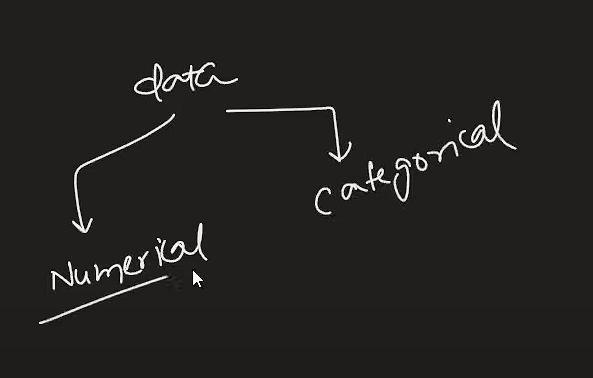](http://)
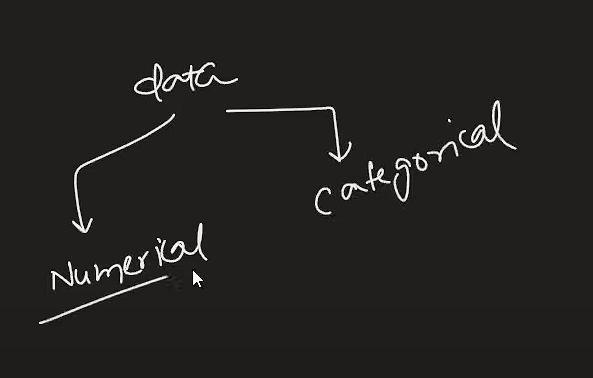

In [22]:
cleaned_df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [23]:
cleaned_df.shape

(2595, 12)

**Univariate Analysis**

1. *Categorical Data*

# Univariate Analysis

<Axes: xlabel='Make'>

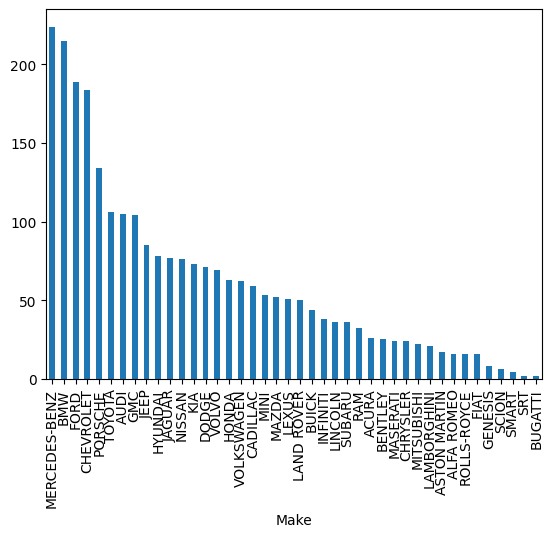

In [24]:
cleaned_df['Make'].value_counts().plot(kind='bar')

In [25]:
import seaborn as sns

In [26]:
cleaned_df['Model'].value_counts()

Model
F-150                             6
F-150 4X4                         6
Sierra 4WD                        5
TERRAIN AWD                       5
CAMARO                            5
                                 ..
NX 300h AWD                       1
NX 200t AWD F SPORT               1
NX 200t AWD                       1
RANGE ROVER SPORT SUPERCHARGED    1
XC40 T4 AWD                       1
Name: count, Length: 2053, dtype: int64

**if we are doing univariate analysis and we have a categorical data either we can do a countplot or we can do a pie chart plot**

<Axes: ylabel='count'>

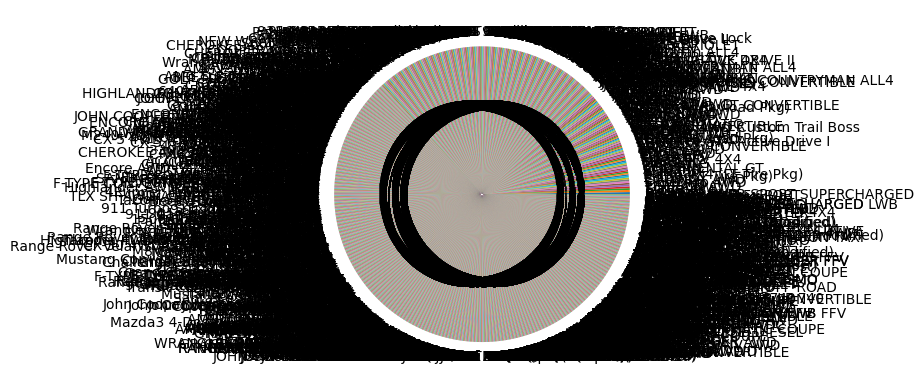

In [27]:
cleaned_df['Model'].value_counts().plot(kind='pie', autopct='%.2f')

The plot you shared is overcrowded because there are too many unique values in the Model column to effectively visualize as a pie chart. Here's how you can improve the visualization:

Options to Address the Issue:
Aggregate Data:

Group similar models or categories into broader categories.
For example, combine similar types of models into categories like SUV, Sedan, Truck, etc.
Limit the Number of Categories:

Visualize only the top 10 or 15 most common models and group the rest as "Other".

<Axes: title={'center': 'Top 10 Models'}, ylabel='count'>

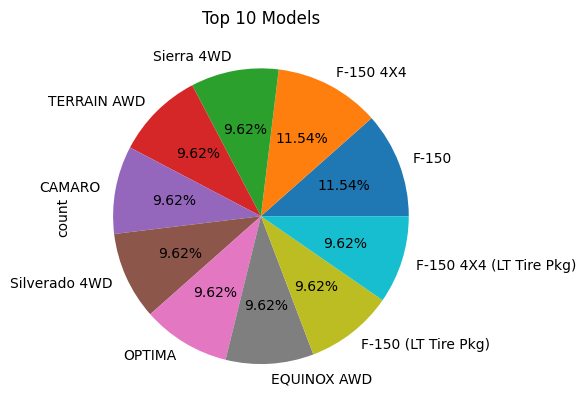

In [28]:
cleaned_df['Model'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.2f%%', title='Top 10 Models')


[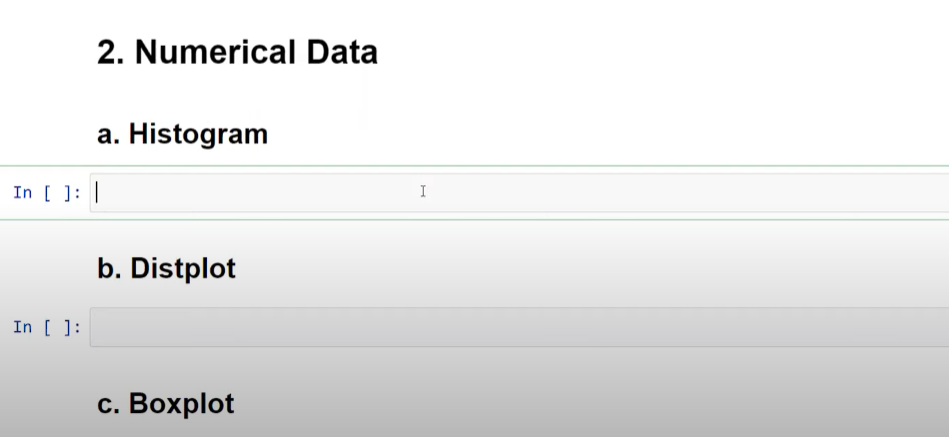](http://)

In [29]:
cleaned_df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**a. Histogram**

<Axes: ylabel='Frequency'>

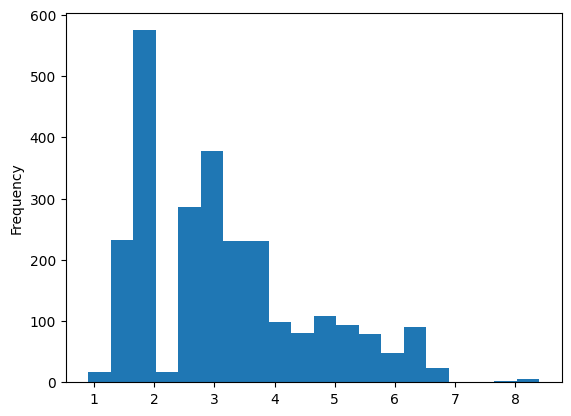

In [30]:
cleaned_df['Engine Size(L)'].plot(kind='hist', bins=20)

**b. Distplot**

/tmp/ipykernel_17/2231575445.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df["Engine Size(L)"])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Engine Size(L)', ylabel='Density'>

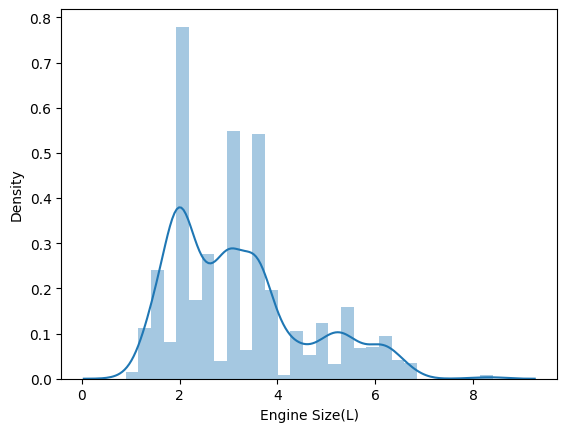

In [31]:
sns.distplot(cleaned_df["Engine Size(L)"])

the probability distribution function tells about the probability of being a particular thing. lets go through an example suppose we are picking a random engine size value from this data then the probability of being a 2 liter engine size in the data is being upto 40%

**c. Box Plot**

[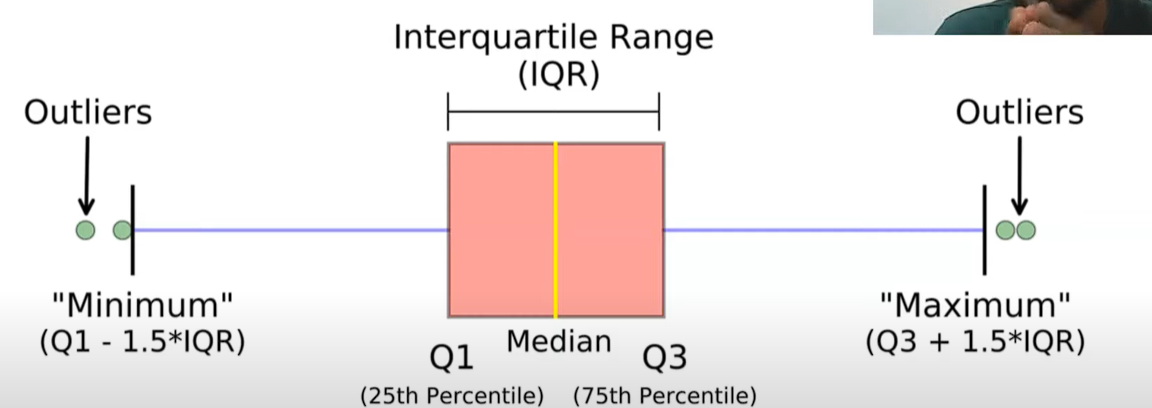](http://)

<Axes: >

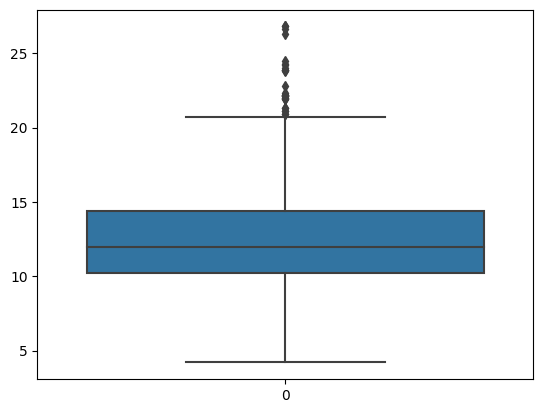

In [32]:
sns.boxplot(cleaned_df["Fuel Consumption City (L/100 km)"])

lets make it horizontal

<Axes: xlabel='Fuel Consumption City (L/100 km)'>

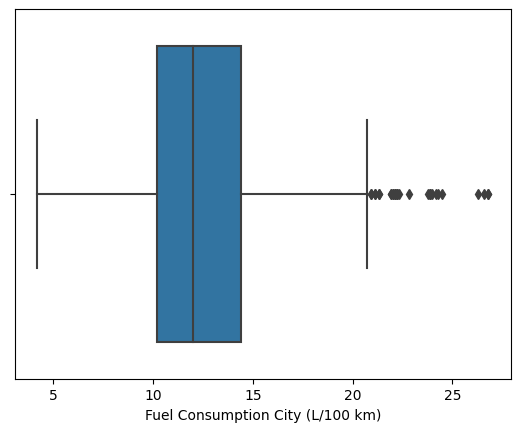

In [33]:
sns.boxplot(x=cleaned_df["Fuel Consumption City (L/100 km)"], orient='h')


In [34]:
cleaned_df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [35]:
cleaned_df['Engine Size(L)'].min()

0.9

In [36]:
cleaned_df['Engine Size(L)'].max()

8.4

In [37]:
cleaned_df['Engine Size(L)'].mean()

3.2033140655105976

In [38]:
cleaned_df['Fuel Consumption Comb (L/100 km)'].min()

4.1

In [39]:
cleaned_df[cleaned_df['Fuel Consumption Comb (L/100 km)']== 4.1]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
3824,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
5931,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96


In [40]:
cleaned_df['Fuel Consumption Comb (L/100 km)'].max()

22.2

In [41]:
cleaned_df[cleaned_df['Fuel Consumption Comb (L/100 km)']== 22.2]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522


In [42]:
cleaned_df['CO2 Emissions(g/km)'].min()

96

In [43]:
cleaned_df[cleaned_df['CO2 Emissions(g/km)']==96]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
3824,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96
5931,HYUNDAI,IONIQ Blue,FULL-SIZE,1.6,4,AM6,X,4.2,4.0,4.1,69,96


In [44]:
cleaned_df['CO2 Emissions(g/km)'].max()

522

In [45]:
cleaned_df[cleaned_df['CO2 Emissions(g/km)']==522]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,AM7,Z,26.8,16.6,22.2,13,522


In [46]:
cleaned_df['CO2 Emissions(g/km)'].mean()

254.2616570327553

In [47]:
cleaned_df[cleaned_df['CO2 Emissions(g/km)']==254]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
2879,LAND ROVER,RANGE ROVER TD6 DIESEL,SUV - STANDARD,3.0,6,AS8,D,10.6,8.1,9.4,30,254
2883,LAND ROVER,RANGE ROVER SPORT TD6 DIESEL,SUV - STANDARD,3.0,6,AS8,D,10.6,8.1,9.4,30,254
3309,VOLVO,XC70 T5 AWD,SUV - SMALL,2.5,5,AS6,X,12.5,9.2,11.0,26,254
3992,LINCOLN,MKC AWD (Start/Stop),SUV - SMALL,2.0,4,AS6,X,12.1,9.3,10.8,26,254
5573,BMW,X7 xDrive40i,SUV - STANDARD,3.0,6,AS8,Z,12.0,9.4,10.8,26,254
5645,CHEVROLET,Impala,FULL-SIZE,3.6,6,AS6,X,12.7,8.5,10.8,26,254
6205,MERCEDES-BENZ,E 450 4MATIC Wagon,STATION WAGON - MID-SIZE,3.0,6,A9,Z,12.3,8.9,10.8,26,254
6449,TOYOTA,Sienna,MINIVAN,3.5,6,AS8,X,12.4,8.9,10.8,26,254


****Day 22****

# Bivariate/ Multivariate analysis

**comninations possible of Bivariate/ Multivaritate analysis**
 * Numerical- Numerical
  * Numerical- Categorical
    

[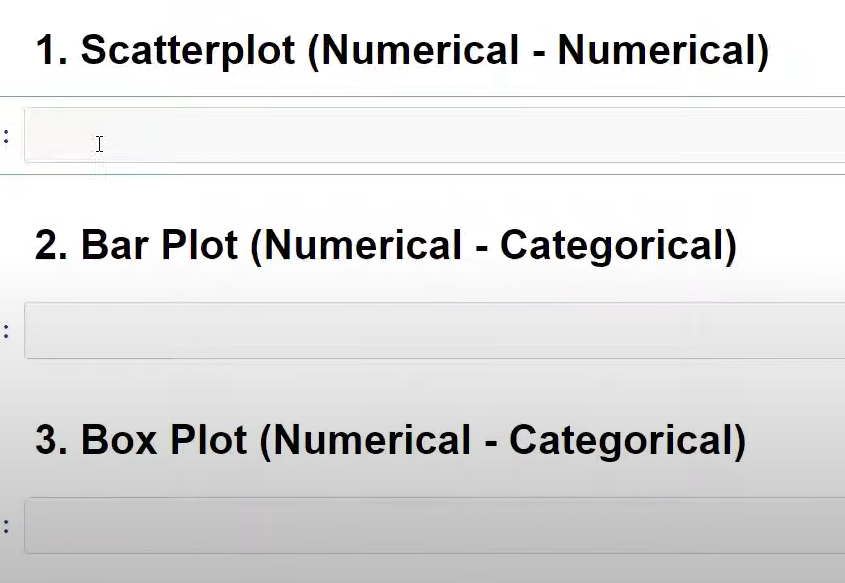](http://)
[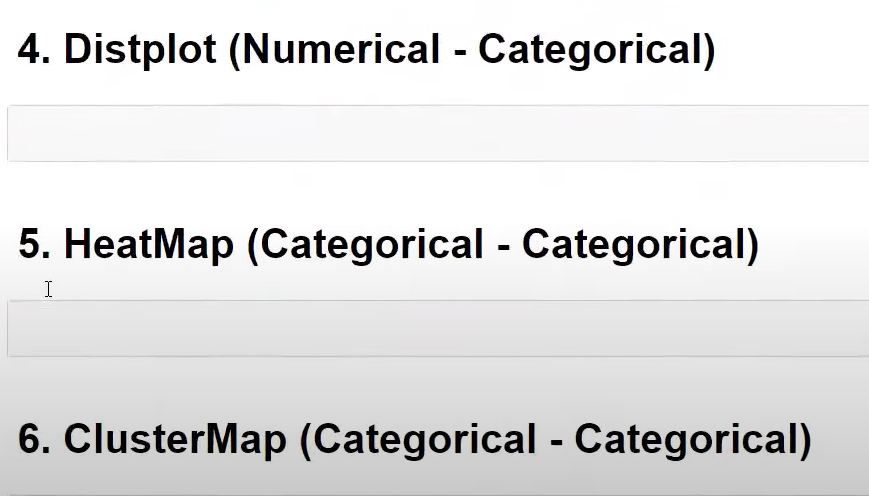](http://)
[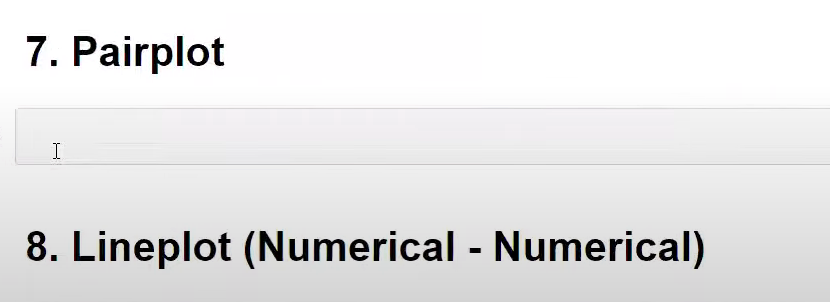](http://)

<Axes: xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

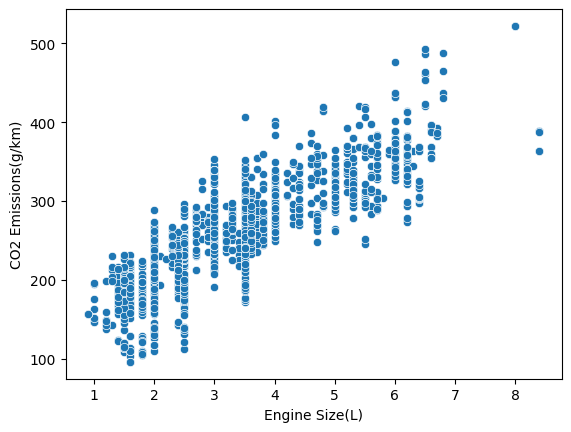

In [48]:
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=cleaned_df)


we can see from this data engine size above 4 liters are emitting more than 200 g/km

In [49]:
cleaned_df['Fuel Type'].value_counts()

Fuel Type
Z    1272
X    1235
D      88
Name: count, dtype: int64

**Multivariate Analysis**

<Axes: xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

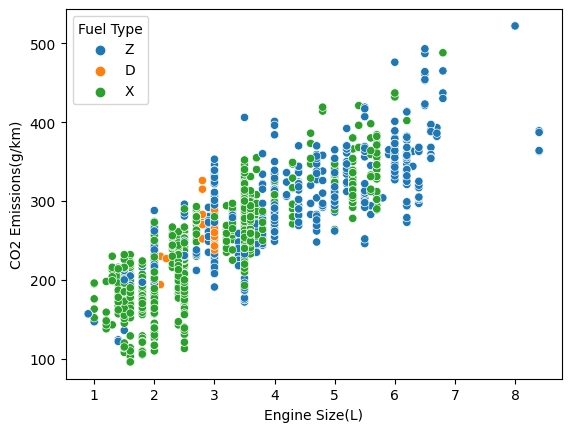

In [50]:
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', hue='Fuel Type', data=cleaned_df)

In [51]:
#remove all non numeric column first to plot a correlation matrix
cleaned_df2 = cleaned_df.select_dtypes(include=[np.number])


<Axes: >

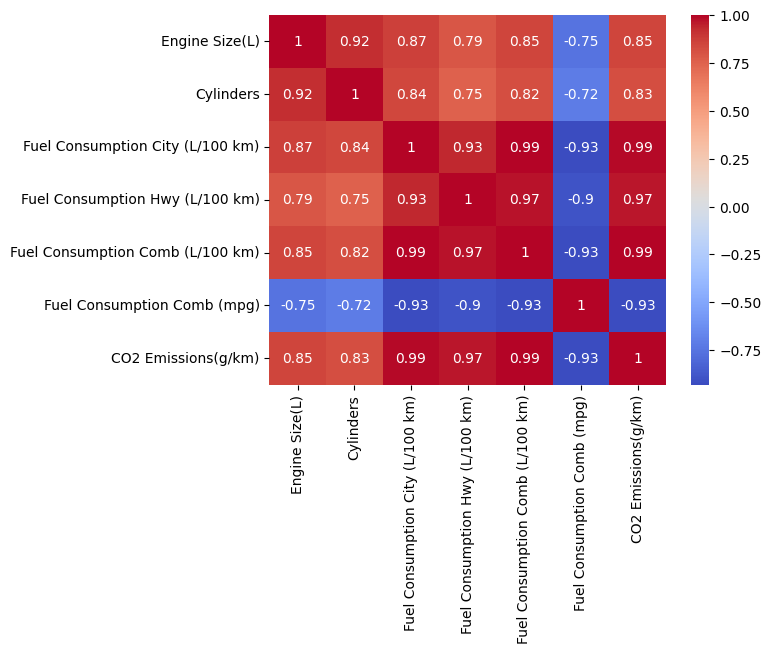

In [52]:
correlation_matrix = cleaned_df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

2. **Bar Plot(numerical-categorical)**

<Axes: xlabel='Vehicle Class', ylabel='CO2 Emissions(g/km)'>

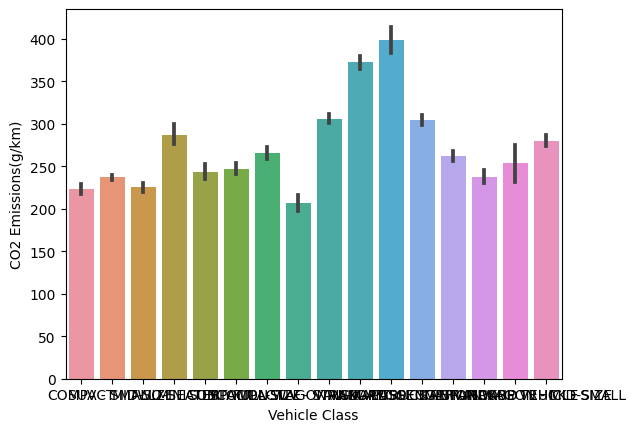

In [53]:
sns.barplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=cleaned_df)

In [54]:
import matplotlib.pyplot as plt

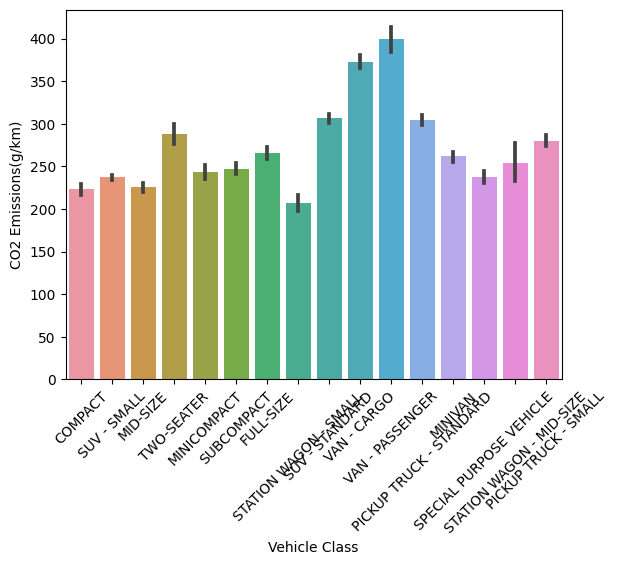

In [55]:
sns.barplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=cleaned_df)
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.show()


<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Vehicle Class'>

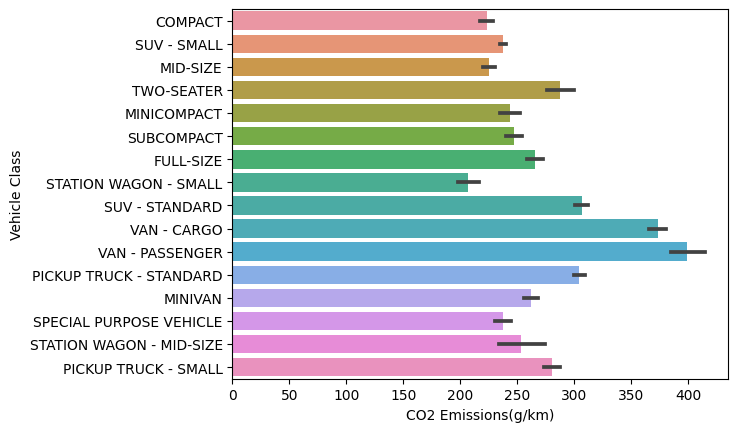

In [56]:
sns.barplot(y='Vehicle Class', x='CO2 Emissions(g/km)', data=cleaned_df)

